A procedure for estimating the fractal dimension of a waveform


Reference: https://arxiv.org/abs/1003.5266

In [2]:
# creating a procedure for estimating the fractal dimension of a waveform
import numpy as np
import scipy.signal
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from scipy import stats

In [3]:
train = pd.read_csv('Datasets/train.csv')

In [4]:
salesDate = train[['MoSold','YrSold', 'SalePrice']]

In [27]:
salesDate = salesDate.groupby(['YrSold', 'MoSold']).agg({'SalePrice':sum})
salesDate

SalePrice
YrSold MoSold           
2006   1         2010900
       2         1748900
       3         4624555
       4         4706446
       5         6039275
       6         8269600
       7        12275141
       8         4513519
       9         3356533
       10        4136561
       11        3412560
       12        2226540
2007   1         2382050
       2         1410414
       3         4061059
       4         3927770
       5         7304561
       6        10603823
       7         9965239
       8         7357643
       9         2150872
       10        3446861
       11        4745024
       12        3859461
2008   1         2320561
       2         1593700
       3         3213095
       4         4141627
       5         7156710
       6         8656278
       7         8553570
       8         5686232
       9         2883650
       10        3667194
       11        3586678
       12        2458400
2009   1         2276826
       2         1874500
       3         3259400
       4         4723700
       5         6085869
       6        10812395
       7        12077049
       8         4970129
       9         3936987
       10        4730578
       11        3440400
       12        2460218
2010   1         1638526
       2         2622350
       3         4266807
       4         6682417
       5         8564268
       6         6539025
       7          730500

In [32]:
salesDate.to_csv('salesDate.csv')

In [31]:
t = pd.Series(np.arange(1,56))
y = salesDate.SalePrice
y[0:54]

YrSold  MoSold
2006    1          2010900
        2          1748900
        3          4624555
        4          4706446
        5          6039275
        6          8269600
        7         12275141
        8          4513519
        9          3356533
        10         4136561
        11         3412560
        12         2226540
2007    1          2382050
        2          1410414
        3          4061059
        4          3927770
        5          7304561
        6         10603823
        7          9965239
        8          7357643
        9          2150872
        10         3446861
        11         4745024
        12         3859461
2008    1          2320561
        2          1593700
        3          3213095
        4          4141627
        5          7156710
        6          8656278
        7          8553570
        8          5686232
        9          2883650
        10         3667194
        11         3586678
        12         2458400
2009    1    

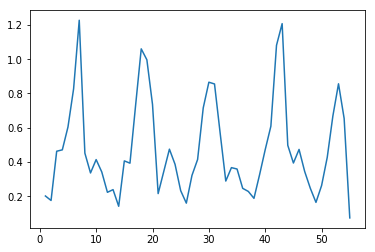

In [17]:
plt.plot(t,y/1e7)
plt.show()

In [11]:
waveform = salesDate.SalePrice
waveform[0]

2010900

In [12]:
x = np.arange(len(waveform)) / len(waveform)
x

array([0.        , 0.01818182, 0.03636364, 0.05454545, 0.07272727,
       0.09090909, 0.10909091, 0.12727273, 0.14545455, 0.16363636,
       0.18181818, 0.2       , 0.21818182, 0.23636364, 0.25454545,
       0.27272727, 0.29090909, 0.30909091, 0.32727273, 0.34545455,
       0.36363636, 0.38181818, 0.4       , 0.41818182, 0.43636364,
       0.45454545, 0.47272727, 0.49090909, 0.50909091, 0.52727273,
       0.54545455, 0.56363636, 0.58181818, 0.6       , 0.61818182,
       0.63636364, 0.65454545, 0.67272727, 0.69090909, 0.70909091,
       0.72727273, 0.74545455, 0.76363636, 0.78181818, 0.8       ,
       0.81818182, 0.83636364, 0.85454545, 0.87272727, 0.89090909,
       0.90909091, 0.92727273, 0.94545455, 0.96363636, 0.98181818])

In [13]:
ymax = np.amax(waveform)
ymin = np.amin(waveform)

In [15]:
rescale = [(ymax - y)/(ymax - ymin) for y in waveform]

0.5363465498517475


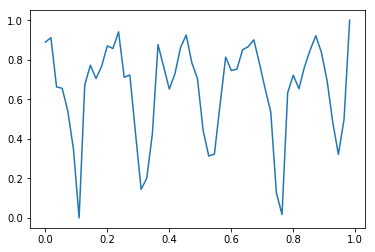

In [17]:
L = sum([np.sqrt((y - rescale[i - 1])**2 + (1/(len(rescale)-1))**2) for i, y in enumerate(rescale) if i > 0])
D = 1 + np.log(L) / np.log(2*(len(rescale) - 1))
print(2- D)
plt.plot(x,rescale)

plt.show()

This result shows that we obtain a Hurst exponent of 0.536.  Given that it is close to 0.5, we can conclude that the monthly fluctuations are Brownian in nature and indicate a balance between anti- and persitent time series.  Essentially, there's no correlation between what occurs at time i and i+1.